In [1]:
import pickle

In [2]:
!ls Datasets/

analysis			    generated_feature.pkl
clean_fake_reliable_features__.csv  generated_feature_targets.pkl
clean_fake_reliable_features.csv    reliable_mini.csv
clean_mini.csv			    rumor_mini.csv
clickbait_mini.csv		    temp_web
Fake_clean.csv			    unreliable_mini.csv
fake_mini.csv			    Web_Scrapping


In [3]:
def read_pickle(path):
    objects = []
    with (open(path, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects


In [19]:
features = read_pickle('Datasets/generated_feature.pkl')
targets = read_pickle('Datasets/generated_feature_targets.pkl')

In [36]:
X = features[0][:2000]
y = targets[0]['target'][:2000]

0    1037
1     963
Name: target, dtype: int64

In [64]:
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

In [51]:
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf)
    return results


xgb = skfold(X, y, xgboost.XGBClassifier())
gnb = skfold(X, y, GaussianNB())
rf = skfold(X, y,RandomForestClassifier())
svc = skfold(X, y,SVC())
ada = skfold(X, y,AdaBoostClassifier())
knn = skfold(X, y,KNeighborsClassifier())
MLPc = skfold(X, y,MLPClassifier())
dic = {'XGB':xgb, 'RandomForest':rf,'SVC':svc,'GaussianNB':gnb,'adaBoost':ada,'KNN':knn, 'MLPc':MLPc}
dic



/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

''

In [52]:
def print_acc(results,model):
    print("Accuracy of {} is {} and std is {}" .format(model ,results.mean()*100, results.std()*100))

print_acc(xgb, 'XGBOOST')
print_acc(rf, 'Random Forest')
print_acc(svc, 'SVC ')
print_acc(gnb, 'gnb ')
print_acc(ada, 'adab ')
print_acc(knn, 'knn ')
print_acc(MLPc, 'mlp ')



Accuracy of XGBOOST is 84.89976999424987 and std is 1.3402324772197205
Accuracy of Random Forest is 80.24419485487137 and std is 2.7735687092850947
Accuracy of SVC  is 61.60266881672041 and std is 2.884279245596373
Accuracy of gnb  is 77.34791119777995 and std is 1.9497949944449182
Accuracy of adab  is 82.45149128728218 and std is 1.7190477701557179
Accuracy of knn  is 62.30243006075151 and std is 2.3056143464548278
Accuracy of mlp  is 66.57821570539262 and std is 9.29775236941885


In [61]:

import pandas as pd
results = pd.DataFrame(dic).applymap(lambda x: x*100)

In [62]:
results

,GaussianNB,KNN,MLPc,RandomForest,SVC,XGB,adaBoost
0,78.606965,61.194030,65.671642,85.074627,58.706468,85.074627,84.079602
1,78.109453,62.189055,68.656716,79.104478,63.184080,83.084577,83.582090
2,77.611940,60.199005,80.597015,80.597015,59.203980,86.069652,79.104478
3,74.500000,66.000000,70.500000,79.000000,61.000000,83.500000,79.500000
4,75.500000,58.500000,74.500000,81.000000,58.000000,86.500000,82.500000
5,80.000000,62.500000,77.500000,80.000000,62.500000,85.000000,83.500000
6,79.000000,64.000000,57.000000,84.500000,67.000000,86.000000,82.500000
7,77.386935,65.829146,48.743719,75.376884,65.829146,82.412060,81.909548
8,78.894472,62.311558,61.306533,77.386935,61.306533,85.929648,83.919598
9,73.869347,60.301508,61.306533,80.402010,59.296482,85.427136,83.919598


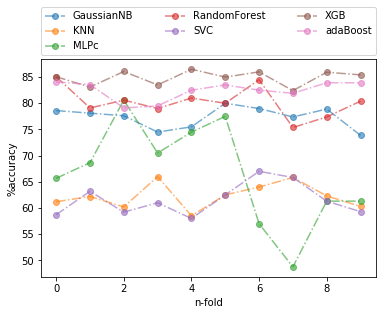

In [108]:
ax = results.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.6})
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
#plt.savefig('visualization/SKF.jpg',dpi=300,format='jpg')


In [66]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
print(__version__)`

2.4.1
